In [1]:
# Tasks to be Done:
# Using MNIST Dataset try to buildyourConvolutional Neural Network:
# A. Do some necessary importslike:
#    a. Download the MNIST dataset through Keras
#    b. Import a sequential model
#    c. Import the convolution and pooling layers
#    d. Import dense layers, dropout layer, and the flatten layer
#    e. Import numpy

In [8]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

# preparing the dataset

In [3]:
(x_train,y_train),(x_test,y_test) = load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

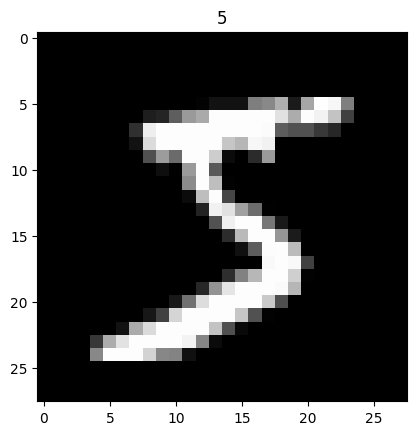

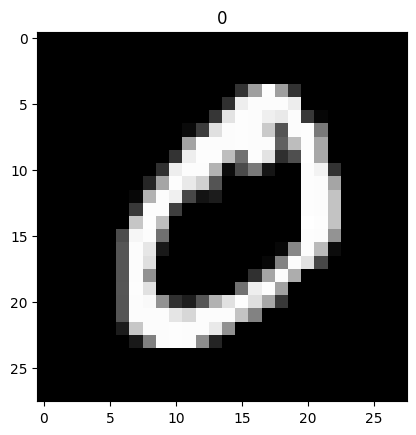

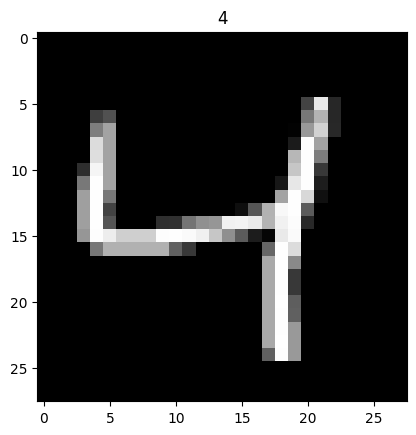

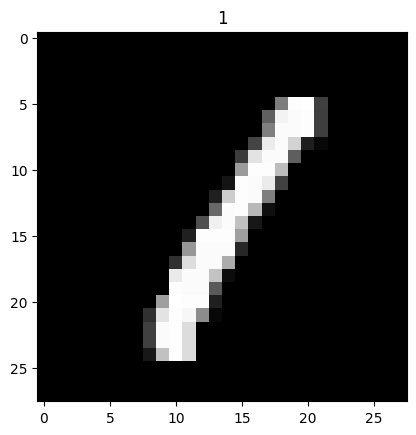

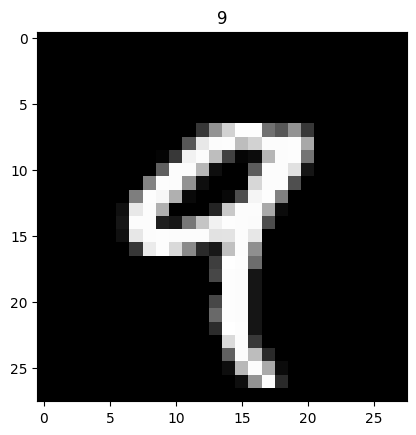

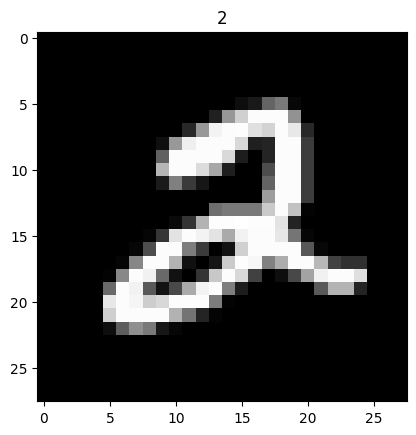

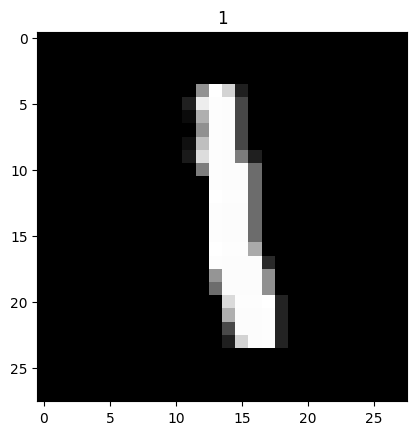

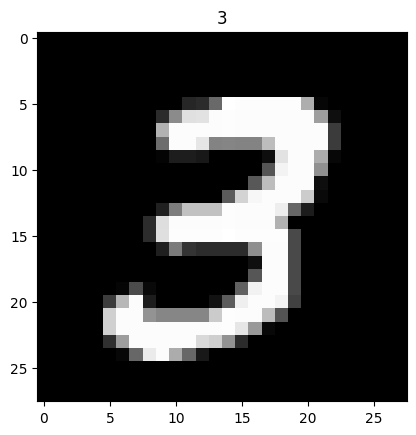

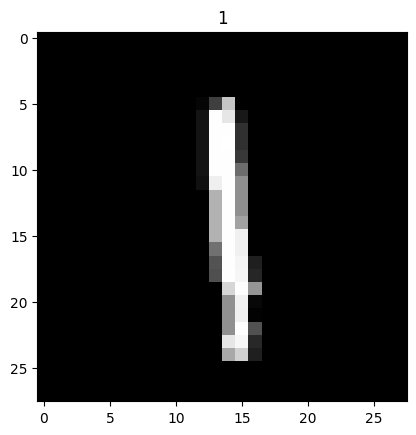

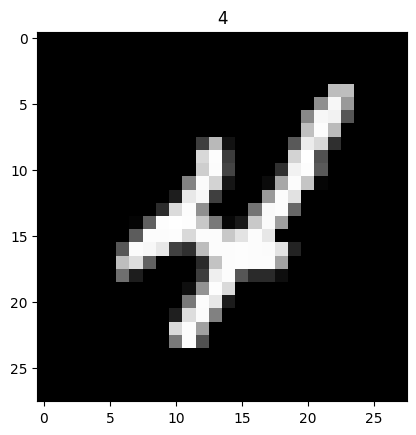

In [7]:
for i in range(10):
  plt.imshow(x_train[i],cmap = 'gray')
  plt.title(str(y_train[i]))
  plt.show()

In [9]:
# converting the data into 2d

In [11]:
x_train = x_train.reshape(60000 , 784)
x_test = x_test.reshape(10000 , 784)

In [12]:
# Performing the normalization

In [13]:
x_train.shape

(60000, 784)

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train_ohe.shape)
print(y_test_ohe.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [18]:
# importing the model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Dropout , Flatten
from tensorflow.keras.optimizers import Adam,Adadelta,SGD
import numpy as np

In [21]:
#  B. Fit the dataset to a model, i.e. train the model for 12 epochs.
#       a. After training the model,evaluate the loss and accuracy of the model on the test
#          data and print it.

# Model-building

In [22]:
model = Sequential()
model.add(Input(784))
model.add(Dense(100 , activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10 , activation ='softmax'))

In [23]:
model.compile(optimizer=Adam(learning_rate = 0.001) , loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [24]:
model.fit(x = x_train , y = y_train_ohe , epochs = 12 , validation_data = (x_test , y_test_ohe))

Epoch 1/12
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2944 - accuracy: 0.9147 - val_loss: 0.1457 - val_accuracy: 0.9564
Epoch 2/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1429 - accuracy: 0.9579 - val_loss: 0.1092 - val_accuracy: 0.9670
Epoch 3/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1052 - accuracy: 0.9681 - val_loss: 0.0890 - val_accuracy: 0.9739
Epoch 4/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0837 - accuracy: 0.9746 - val_loss: 0.0835 - val_accuracy: 0.9762
Epoch 5/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0698 - accuracy: 0.9782 - val_loss: 0.0816 - val_accuracy: 0.9763
Epoch 6/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0600 - accuracy: 0.9812 - val_loss: 0.0813 - val_accuracy: 0.9760
Epoch 7/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0541 - accuracy: 0.9828 - val_loss: 0.0723 - val_accuracy:

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
history = model.history.history

In [27]:
val_loss = history['loss']
val_acc = history['accuracy']
train_loss = history['val_loss']
train_acc = history['val_accuracy']

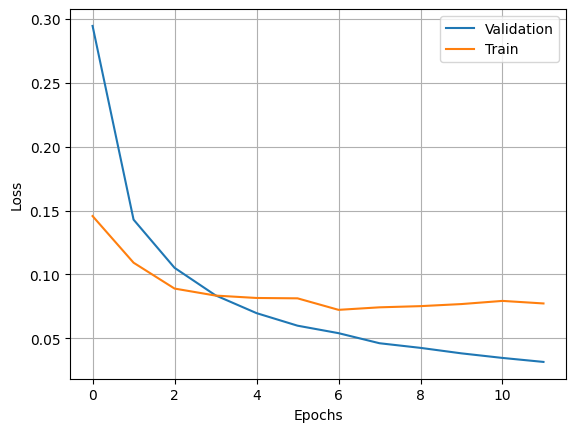

In [28]:
plt.plot(val_loss)
plt.plot(train_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Validation' , 'Train'])
plt.grid()
plt.show()

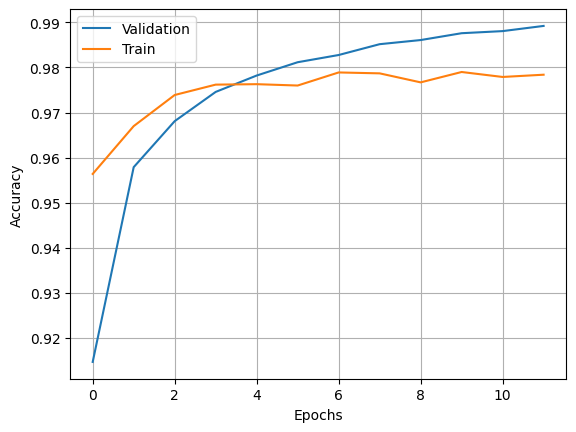

In [29]:
plt.plot(val_acc)
plt.plot(train_acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Validation' , 'Train'])
plt.grid()
plt.show()

#prediction

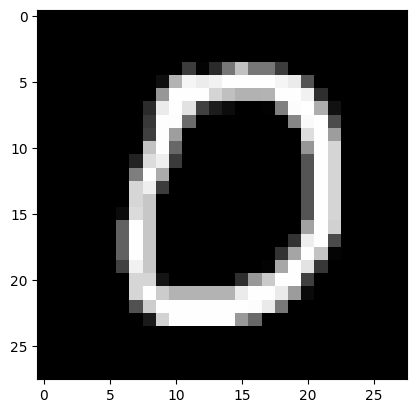

In [30]:
plt.imshow(x_test.reshape(10000, 28, 28)[10], cmap="gray")
plt.show()
